<a href="https://colab.research.google.com/github/mhbagheri-99/Python_FinalProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


# Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

Here we have defined the rules of GoF in our function that takes the grid (initial seed) and number of generations which is how many levels we want to proceed.

In [ ]:
import numpy as np
import PIL as p
from PIL import Image
from IPython.display import Image, display

def game_of_life(grid, num_generations):
    generations = [grid]
    for _ in range(num_generations):
        # Create a copy of the current grid
        next_grid = np.copy(grid)

        # Iterate over each cell in the grid
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                # Count the number of live neighbors
                live_neighbors = np.sum(grid[max(0, i-1):min(i+2, grid.shape[0]), max(0, j-1):min(j+2, grid.shape[1])]) - grid[i, j]

                # Apply the rules of the Game of Life
                if grid[i, j] == 1 and (live_neighbors < 2 or live_neighbors > 3):
                    next_grid[i, j] = 0
                elif grid[i, j] == 0 and live_neighbors == 3:
                    next_grid[i, j] = 1

        # Update the grid for the next generation
        grid = next_grid
        generations.append(grid)

    return generations


Defined a function that takes the GoF function paramateres as well as necessary parameters to iterate and calculate the generations and save them as visual files (both .png and .gif)

In [ ]:
def visualize_and_save(pattern, num_generations, filename_prefix):
    generations = game_of_life(pattern, num_generations)

    # Export each generation as a .png image
    for i, generation in enumerate(generations):
        image = p.Image.fromarray((generation * 255).astype(np.uint8))
        image.save(f'{filename_prefix}/result_generation_{i}.png')

    # Create a sequence with .gif format
    images = [p.Image.open(f'{filename_prefix}/result_generation_{i}.png') for i in range(len(generations))]
    images[0].save(f'{filename_prefix}/result_animation.gif', format="GIF", append_images=images[1:], save_all=True, duration=400, loop=0)

    # Display the GIF
    display(Image(filename=f'{filename_prefix}/result_animation.gif', width=500))


A very simple (blinking in this case) example with 10 iterations.

In [ ]:
# Example usage
grid = np.array([[0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0]])

visualize_and_save(grid,10,'grid')

Examples in *still lifes*, *oscillators* and *spaceships* categories:

In [ ]:
# https://conwaylife.com/wiki/Block
block = np.array([[0,0,0,0],
                  [0,1,1,0],
                  [0,1,1,0],
                  [0,0,0,0]])
print("Block:")
visualize_and_save(block, 10, 'still_life/block')

# https://conwaylife.com/wiki/Beehive
beehive = np.array([[0,0,0,0,0,0],
                    [0,0,1,1,0,0],
                    [0,1,0,0,1,0],
                    [0,0,1,1,0,0],
                    [0,0,0,0,0,0]])
print("Beehive:")
visualize_and_save(beehive, 10, 'still_life/beehive')

# https://conwaylife.com/wiki/Loaf
loaf = np.array([[0,0,0,0,0,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,0,1,0,1,0],
                 [0,0,0,1,0,0],
                 [0,0,0,0,0,0]])
print("Loaf:")
visualize_and_save(loaf, 10, 'still_life/loaf')




Block:


Beehive:


Loaf:


In [ ]:
# https://conwaylife.com/wiki/Blinker
blinker = np.array([[0,0,0,0,0],
                    [0,0,1,0,0],
                    [0,0,1,0,0],
                    [0,0,1,0,0],
                    [0,0,0,0,0]])
print("Blinker:")
visualize_and_save(blinker, 10, 'oscillator/blinker')

# https://conwaylife.com/wiki/Toad
toad = np.array([[0,0,0,0,0,0],
                 [0,0,0,0,0,0],
                 [0,0,1,1,1,0],
                 [0,1,1,1,0,0],
                 [0,0,0,0,0,0],
                 [0,0,0,0,0,0]])
print("Toad:")
visualize_and_save(toad, 10, 'oscillator/toad')

# https://conwaylife.com/wiki/Beacon
beacon = np.array([[0,0,0,0,0,0],
                   [0,1,1,0,0,0],
                   [0,1,1,0,0,0],
                   [0,0,0,1,1,0],
                   [0,0,0,1,1,0],
                   [0,0,0,0,0,0]])
print("Beacon:")
visualize_and_save(beacon, 10, 'oscillator/beacon')


Blinker:


Toad:


Beacon:


Function to expand the game space, gets the new grid size, the original pattern and an *(x,y)* coordinate to put the original pattern there.

In [ ]:
def expand_space(pattern, size, x, y):
    expanded_matrix = np.zeros((size,size))
    expanded_matrix[x:pattern.shape[0]+x,y:pattern.shape[1]+y] = pattern
    return expanded_matrix

Glider:


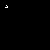

LWSS:


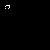

HWSS:


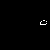

In [ ]:
"""
This code defines three spaceships: glider, lwss, and mwss. Each spaceship is represented as a numpy array.
The `visualize_and_save` function is called for each spaceship to visualize and save the spaceship pattern.
"""

# https://conwaylife.com/wiki/Glider
glider =np.array(
[
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])

# https://conwaylife.com/wiki/Lightweight_spaceship
lwss = np.array(
[               [0, 1, 1, 1, 1],
                [1, 0, 0, 0, 1],
                [0, 0, 0, 0, 1],
                [1, 0, 0, 1, 0]
])

# https://conwaylife.com/wiki/Heavyweight_spaceship
hwss = np.array([[0, 0, 0, 1, 1, 0, 0],
                 [0, 1, 0, 0, 0, 0, 1],
                 [1, 0, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 0, 0, 1],
                 [1, 1, 1, 1, 1, 1, 0]])


print("Glider:")
visualize_and_save(expand_space(glider, 50, 5, 5), 20, 'spaceship/glider')
print("LWSS:")
visualize_and_save(expand_space(lwss, 50, 5, 5), 20, 'spaceship/lwss')
print("HWSS:")
visualize_and_save(expand_space(hwss, 50, 20, 40), 20, 'spaceship/hwss')

**Some more complex patterns:**
     
     1. Gosper Glider Gun: https://conwaylife.com/wiki/Gosper_glider_gun

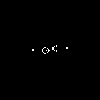

In [ ]:
def gosper_glider_gun():
    gun = np.zeros((11, 38), dtype=int)

    gun[5][1] = gun[5][2] = 1
    gun[6][1] = gun[6][2] = 1

    gun[3][13] = gun[3][14] = 1
    gun[4][12] = gun[4][16] = 1
    gun[5][11] = gun[5][17] = 1
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 1
    gun[7][11] = gun[7][17] = 1
    gun[8][12] = gun[8][16] = 1
    gun[9][13] = gun[9][14] = 1

    gun[1][25] = 1
    gun[2][23] = gun[2][25] = 1
    gun[3][21] = gun[3][22] = 1
    gun[4][21] = gun[4][22] = 1
    gun[5][21] = gun[5][22] = 1
    gun[6][23] = gun[6][25] = 1
    gun[7][25] = 1

    gun[3][35] = gun[3][36] = 1
    gun[4][35] = gun[4][36] = 1

    return gun


gosper_glider_gun_pattern = gosper_glider_gun()
visualize_and_save(
    expand_space(gosper_glider_gun_pattern, 100, (100 - gosper_glider_gun_pattern.shape[0]) // 2, (100 - gosper_glider_gun_pattern.shape[1]) // 2),
    100, 'pattern_examples/gosper_glider_gun')

        2. Pulsar Oscillator: https://conwaylife.com/wiki/Pulsar

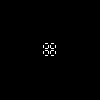

In [ ]:
def pulsar_oscillator():
    pulsar = np.zeros((15, 15), dtype=int)

    pulsar[1,3:6] = pulsar[1,9:12] = 1
    pulsar[6,3:6] = pulsar[6,9:12] = 1
    pulsar[8,3:6] = pulsar[8,9:12] = 1
    pulsar[13,3:6] = pulsar[13,9:12] = 1

    pulsar[3:6,1] = pulsar[9:12,1] = 1
    pulsar[3:6,6] = pulsar[9:12,6] = 1
    pulsar[3:6,8] = pulsar[9:12,8] = 1
    pulsar[3:6,13] = pulsar[9:12,13] = 1

    return pulsar

# Example usage
pulsar_pattern = pulsar_oscillator()
visualize_and_save(
    expand_space(pulsar_pattern, 100, (100 - pulsar_pattern.shape[0]) // 2, (100 - pulsar_pattern.shape[1]) // 2),
    50, 'pattern_examples/pulsar_oscillator')


     3. Acorn Pattern: https://conwaylife.com/wiki/Acorn

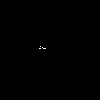

In [ ]:
def acorn():
    acorn = np.zeros((7, 21), dtype=int)

    acorn[0][1] = 1
    acorn[1][3] = 1
    acorn[2][0:2] = acorn[2][4:7] = 1

    return acorn

# Example usage
acorn_pattern = acorn()
visualize_and_save(
    expand_space(acorn_pattern, 100, (100 - acorn_pattern.shape[0]) // 2, (100 - acorn_pattern.shape[1]) // 2),
    300, 'pattern_examples/acorn_pattern')


Defined a function to analyze the pattern in a given number of iterations. We calculated
1. the frequency (when original pattern and one of its generations are identical)
2. occupancy which shows how many alive cells we have at each generation
3. heat or replication which is calculated by averaging the number of changes in the state of cells in each consecutive generations by calculating and summing their XOR
4. speed by a multiplier of "c" which is speed of life (light)

One clever thing I did here was cutting out the active area of the game to be able to check if our periodic pattern is of spaceship type that helped me in knowing if it had the speed parameter or not.

One thing is that this function analyzes the basics and most common things in a game, for more complex patterns that we have, there would be much more parameters that are very specific to each of their type, for example in acorn pattern we can calculate the lifespan and population which doesn't apply to the other patterns such as spaceships.

In [ ]:
def analyze_evolution(pattern, num_generations):
    generations = game_of_life(pattern, num_generations)

    min_x, max_x, min_y, max_y = [], [], [], []
    active_grid = []
    is_spaceship = False

    for i in range(len(generations)):
      alive_cells = np.argwhere(generations[i] == 1)

      min_x.append(np.min(alive_cells[:,0]))
      max_x.append(np.max(alive_cells[:,0]))
      min_y.append(np.min(alive_cells[:,1]))
      max_y.append(np.max(alive_cells[:,1]))

      active_grid.append(generations[i][min_x[i]:max_x[i]+1, min_y[i]:max_y[i]+1])

    # Calculate frequency
    frequency = None
    for i in range(1, num_generations):
      if np.array_equal(active_grid[0], active_grid[i]):
          frequency = i
          if min_x[0] != min_x[i] or min_y[0] != min_y[i]:
            is_spaceship = True
          break

    # Calculate occupancy
    occupancy = [np.sum(generation) for generation in generations]

    # Calculate replication or heat
    total_changes = 0
    for i in range(num_generations-1):
      total_changes += np.logical_xor(generations[i]==1, generations[i+1]==1).sum()

    replication = np.abs(total_changes/(num_generations-1))

    # Calculate speed (if applicable) according to https://conwaylife.com/wiki/Speed
    speed = None
    if is_spaceship:
      speed = max(abs(min_x[frequency]-min_x[0]), abs(min_y[frequency]-min_y[0])) / frequency

    return {
        'frequency': frequency,
        'occupancy': occupancy,
        'replication': replication,
        'speed (fraction of "c")': speed
    }

Analysis of the Still Life Patterns:

As we can see, they have the frequency of "1" which means their "still life" patterns and don't change at all.

In [ ]:
print("Block Analysis:", analyze_evolution(block, 10))
print("Beehive Analysis:", analyze_evolution(beehive, 10))
print("Loaf Analysis:", analyze_evolution(loaf, 10))

Block Analysis: {'frequency': 1, 'occupancy': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 'replication': 0.0, 'speed (fraction of "c")': None}
Beehive Analysis: {'frequency': 1, 'occupancy': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 'replication': 0.0, 'speed (fraction of "c")': None}
Loaf Analysis: {'frequency': 1, 'occupancy': [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], 'replication': 0.0, 'speed (fraction of "c")': None}


Analysis of the Oscillator Patterns:

In [ ]:
print("Blinker Analysis:", analyze_evolution(blinker, 10))
print("Beacon Analysis:", analyze_evolution(beacon, 10))
print("Toad Analysis:", analyze_evolution(toad, 10))

Blinker Analysis: {'frequency': 2, 'occupancy': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], 'replication': 4.0, 'speed (fraction of "c")': None}
Beacon Analysis: {'frequency': 2, 'occupancy': [8, 6, 8, 6, 8, 6, 8, 6, 8, 6, 8], 'replication': 2.0, 'speed (fraction of "c")': None}
Toad Analysis: {'frequency': 2, 'occupancy': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 'replication': 8.0, 'speed (fraction of "c")': None}


Analysis of the Spaceship Patterns:

In [ ]:
print("Glider Analysis:", analyze_evolution(expand_space(glider, 50, 5, 5), 20))
print("LWSS Analysis:", analyze_evolution(expand_space(lwss, 50, 5, 5), 20))
print("HWSS Analysis:", analyze_evolution(expand_space(hwss, 50, 20, 40), 20))

Glider Analysis: {'frequency': 4, 'occupancy': [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], 'replication': 4.0, 'speed (fraction of "c")': 0.25}
LWSS Analysis: {'frequency': 4, 'occupancy': [9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0, 12.0, 9.0], 'replication': 10.894736842105264, 'speed (fraction of "c")': 0.5}
HWSS Analysis: {'frequency': 4, 'occupancy': [13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0, 18.0, 13.0], 'replication': 18.789473684210527, 'speed (fraction of "c")': 0.5}


Gosper Glider Gun Analysis:

In [ ]:
print("Gosper Glider Gun Analysis:", analyze_evolution(
    expand_space(gosper_glider_gun_pattern, 100, (100 - gosper_glider_gun_pattern.shape[0]) // 2, (100 - gosper_glider_gun_pattern.shape[1]) // 2),
    20))

Gosper Glider Gun Analysis: {'frequency': None, 'occupancy': [36.0, 39.0, 43.0, 48.0, 51.0, 44.0, 51.0, 48.0, 61.0, 42.0, 48.0, 50.0, 54.0, 55.0, 56.0, 42.0, 44.0, 47.0, 53.0, 54.0, 54.0], 'replication': 37.05263157894737, 'speed (fraction of "c")': None}


Pulsar Oscillator Analysis:

In [ ]:
print("Pulsar Oscillator Analysis:", analyze_evolution(
    expand_space(pulsar_pattern, 100, (100 - pulsar_pattern.shape[0]) // 2, (100 - pulsar_pattern.shape[1]) // 2),
    20))

Pulsar Oscillator Analysis: {'frequency': 3, 'occupancy': [48.0, 56.0, 72.0, 48.0, 56.0, 72.0, 48.0, 56.0, 72.0, 48.0, 56.0, 72.0, 48.0, 56.0, 72.0, 48.0, 56.0, 72.0, 48.0, 56.0, 72.0], 'replication': 43.36842105263158, 'speed (fraction of "c")': None}


Acorn Analysis:

In [ ]:
print("Acorn Analysis:", analyze_evolution(
    expand_space(acorn_pattern, 100, (100 - acorn_pattern.shape[0]) // 2, (100 - acorn_pattern.shape[1]) // 2),
    20))

Acorn Analysis: {'frequency': None, 'occupancy': [7.0, 8.0, 10.0, 11.0, 11.0, 13.0, 15.0, 15.0, 18.0, 20.0, 30.0, 19.0, 14.0, 17.0, 20.0, 24.0, 28.0, 28.0, 25.0, 29.0, 32.0], 'replication': 13.368421052631579, 'speed (fraction of "c")': None}
